In [1]:
import numpy as np
import astropy.units as u
from astropy import constants
from scipy.optimize import fsolve
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# constants.c
Lbol = pd.read_csv("/Users/alexgagliano/Documents/Research/2020oi/scripts/superbol/SBO_input/superbol_output_2020oi/logL_bb_2020oi_AUBgVriz.txt", delimiter='\t', header=None, names=['MJD', 'logL', 'logLerr'])

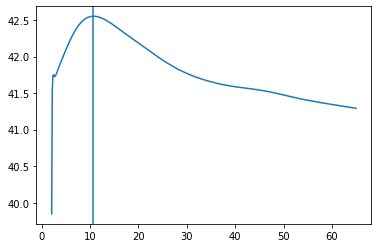

In [3]:
plt.plot(Lbol['MJD']-58854.2, Lbol['logL'])
plt.axvline(x=10.67)

In [4]:
np.nanmax(Lbol['logL'])

42.553

In [5]:
Lbol['logLerr'].values[Lbol['logL']==np.nanmax(Lbol['logL'])]

array([0.099, 0.099, 0.099])

In [6]:
10**(42.553 - 0.099)

2.8444611074479197e+42

In [9]:
#Peak time and peak luminosity of your transient go here.
t_peak = 10.67 #day #uncertainty is 0.2
#t_peak = 10.67 - 0.2
#t_peak = 10.67 + 0.2
L_peak = 3.57e42 #erg/s
#L_peak = 10**(42.553 - 0.099) #low
#L_peak = 10**(42.553 + 0.099) #high

#Also the ejecta velocity and opacity near peak
kappa = 0.07*u.cm**2/u.g
vej = 12750*u.km/u.s

In [11]:
#Define heating rates of Ni and Co
ep_Ni = 3.9e10 #erg/g/s
ep_Co = 6.8e9 #erg/g/s

#Define the decay timescales
t_Ni = 8.8
t_Co = 111.3
tau_Ni = t_peak / t_Ni #d
tau_Co = t_peak / t_Co

## Beta paremeter indicating the Ni/Co distribution
# beta = 3/4 #generic
#beta = 9/8 #Ibc
beta = 0.9


#Heating function to solve from KK19
big_fun = ((1-ep_Co/ep_Ni) * (1-(1+beta*tau_Ni)*np.exp(-beta*tau_Ni)))  + \
                ((ep_Co * t_Co**2 /(ep_Ni * t_Ni**2))*(1-(1+beta*tau_Co)*np.exp(-beta*tau_Co)))

#Solve for MNi
MNi = L_peak * beta**2 *tau_Ni**2 / (2 * ep_Ni) / big_fun

In [12]:
#Solve for Ejecta mass

#First, solve for diffusion time from rise time

#########Heating timescales near peak, pick either Ni or Co depending on your t_peak
#diffusion time
ts = t_Ni

def solve_tpeak(td):
    return (td * (0.11*np.log(1+9*ts/td) + 0.36)) - t_peak

res = fsolve(solve_tpeak, 10)
td = res[0]

#Now Mej can be computed
Mej = (td*u.day)**2 * vej * constants.c/kappa

In [13]:
vej

<Quantity 12750. km / s>

In [15]:
td

19.881632371653616

In [16]:
kappa

<Quantity 0.07 cm2 / g>

In [17]:
(td*u.day)**2 * vej * constants.c/kappa

<Quantity 2.15842482e+16 d2 g km m / (cm2 s2)>

In [18]:
td*u.day

<Quantity 19.88163237 d>

## Results!

In [19]:
print("The nickel-56 mass is %f solar mass."%(MNi*u.g.to(u.Msun)))
print("The ejecta mass is %f solar mass."%(Mej.to(u.Msun).value))

The nickel-56 mass is 0.079709 solar mass.
The ejecta mass is 0.810324 solar mass.


In [185]:
td = np.array([19.881632371653616, 19.436736564670177, 20.32809304429703])
MNi = np.array([0.071434,0.112694,0.088701,0.090611,0.070674,0.111496,0.072196,0.113897])
Mej = np.array([0.810324,0.810324,0.774464,0.847125,0.774464,0.774464,0.847125,0.847125])

In [186]:
np.nanmedian(td)

19.881632371653616

In [187]:
np.std(td)

0.36389494593013055

In [151]:
np.nanmedian(MNi)

0.089656

In [152]:
np.nanmedian(Mej)

0.810324

In [153]:
np.std(MNi)

0.017917435659417755

In [154]:
np.std(Mej)

0.03146379553724208

$M_{\rm ej} = 0.81\pm0.03\,M_{\odot}$

$M_{\rm Ni56} = 0.09\pm0.02\,M_{\odot}$

In [156]:
0.81-0.03

0.78

In [157]:
0.81+0.03

0.8400000000000001